# Imports

In [2]:
import pandas as pd
import os
from os.path import join
import sys
import inspect
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

from detector import TRAINING_FILEPATH

def get_df(base_path, add_var_name='lambda', add_var_val=1):
    df_list = []
    model_id_list = []
    for f in [p for p in os.listdir(base_path) if '.csv' in p]:
        temp_df = pd.read_csv(join(base_path, f), index_col=0)
        temp_df['model_name'] = 'id-'+str(100000000 + int(f.split('.')[0]))[1:]
        df_list.append(temp_df)
    results_df = pd.concat(df_list)
    results_df = results_df.reset_index(drop=True)
    results_df[add_var_name] = add_var_val

    # merge results with metadata
    df = results_df.merge(metadata, how='left', on='model_name')
    df = df.sort_values('trigger_option')
    return df

# get metadata
metadata = pd.read_csv(join(TRAINING_FILEPATH, 'METADATA.csv'))

# Lambda Sensitivity

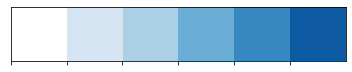

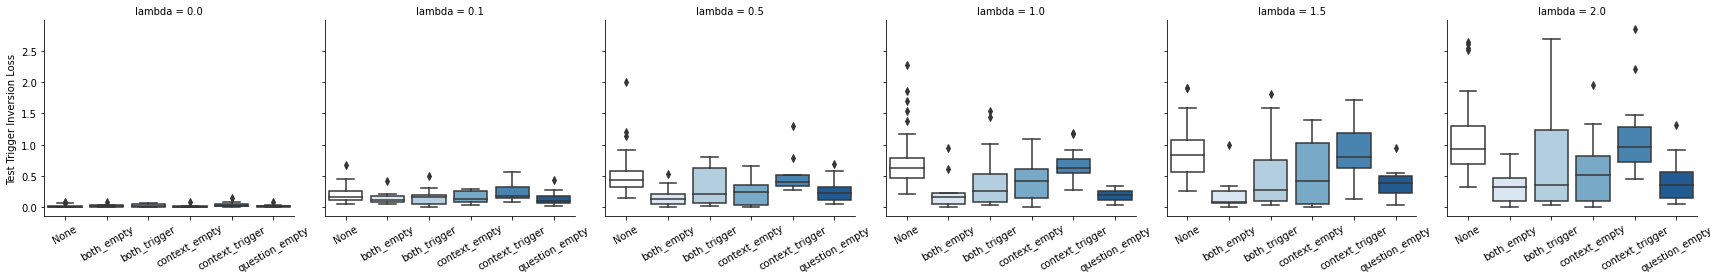

In [7]:
lmbda_list = [0.0, 0.1, 0.5, 1.0, 1.5, 2.0]

df_list = [get_df(f'lambda_{lmbda}_method_discrete_num_candidates_50_trigger_length_5_num_random_tries_2_batch_size_15_triger_locs_end_end_beam_size_1', 'lambda', lmbda) for lmbda in lmbda_list]
df = pd.concat(df_list)

palette = [(1, 1, 1), *sns.color_palette('Blues',5)]
sns.palplot(palette)

g = sns.FacetGrid(df, col="lambda", height=4)

g.map_dataframe(sns.boxplot, x="trigger_option", y="test_trigger_inversion_loss", palette=palette)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
    # axes.set_xlabel('Trigger Option')
g.axes[0,0].set_ylabel('Test Trigger Inversion Loss')
g.tight_layout()
plt.savefig(f'effect_of_lambda.pdf', dpi=2000)

# Position Sensitivity

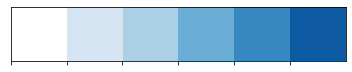

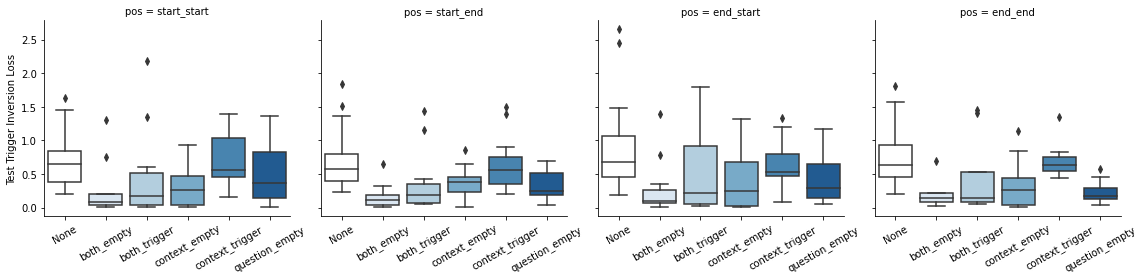

In [3]:
pos_list = ['start_start', 'start_end', 'end_start', 'end_end']

df_list = [get_df(f'lambda_1.0_method_discrete_num_candidates_50_trigger_length_5_num_random_tries_2_batch_size_10_triger_locs_{pos}_beam_size_1_more_clean_data_False', 'pos', pos) for pos in pos_list]
df = pd.concat(df_list)

palette = [(1, 1, 1), *sns.color_palette('Blues',5)]
sns.palplot(palette)

g = sns.FacetGrid(df, col="pos", height=4)

g.map_dataframe(sns.boxplot, x="trigger_option", y="test_trigger_inversion_loss", palette=palette)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
    # axes.set_xlabel('Trigger Option')
g.axes[0,0].set_ylabel('Test Trigger Inversion Loss')
g.tight_layout()
plt.savefig(f'effect_of_pos.pdf', dpi=2000)

# More Data

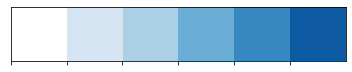

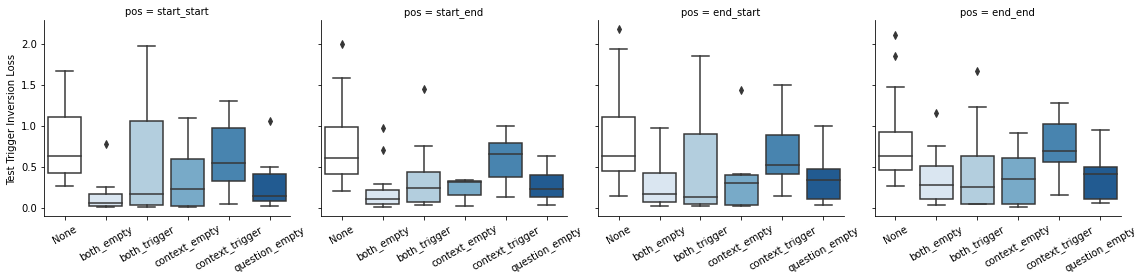

In [3]:
pos_list = ['start_start', 'start_end', 'end_start', 'end_end']

df_list = [get_df(f'lambda_1.0_method_discrete_num_candidates_50_trigger_length_5_num_random_tries_2_batch_size_10_triger_locs_{pos}_beam_size_1_more_clean_data_True', 'pos', pos) for pos in pos_list]
df = pd.concat(df_list)

palette = [(1, 1, 1), *sns.color_palette('Blues',5)]
sns.palplot(palette)

g = sns.FacetGrid(df, col="pos", height=4)

g.map_dataframe(sns.boxplot, x="trigger_option", y="test_trigger_inversion_loss", palette=palette)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
    # axes.set_xlabel('Trigger Option')
g.axes[0,0].set_ylabel('Test Trigger Inversion Loss')
g.tight_layout()
plt.savefig(f'effect_of_more_data.pdf', dpi=2000)

# Specialized Trigger Inversion

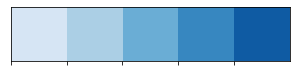

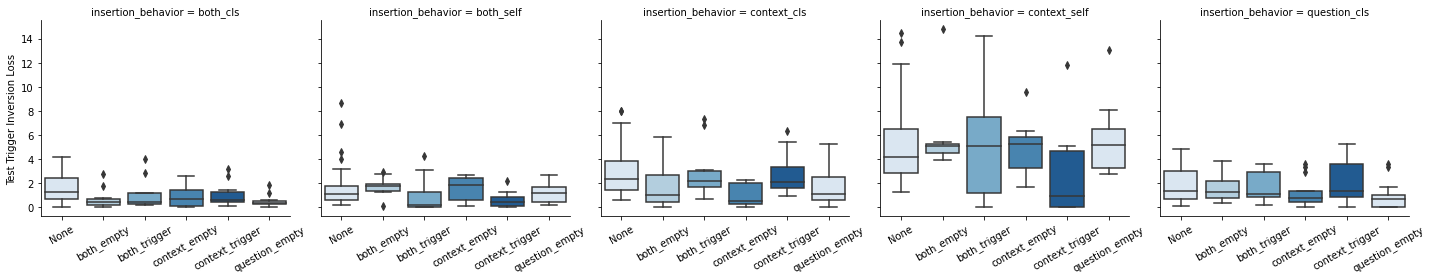

In [9]:
folders = \
['lambda_1.0_method_discrete_num_candidates_10_trigger_length_10_num_random_tries_1_batch_size_10_triger_locs_start_end_beam_size_1_more_clean_data_True_trigger_insertion_both_trigger_behavior_cls',
'lambda_1.0_method_discrete_num_candidates_10_trigger_length_10_num_random_tries_1_batch_size_10_triger_locs_start_end_beam_size_1_more_clean_data_True_trigger_insertion_both_trigger_behavior_self',
'lambda_1.0_method_discrete_num_candidates_10_trigger_length_10_num_random_tries_1_batch_size_10_triger_locs_start_end_beam_size_1_more_clean_data_True_trigger_insertion_context_trigger_behavior_cls',
'lambda_1.0_method_discrete_num_candidates_10_trigger_length_10_num_random_tries_1_batch_size_10_triger_locs_start_end_beam_size_1_more_clean_data_True_trigger_insertion_context_trigger_behavior_self',
'lambda_1.0_method_discrete_num_candidates_10_trigger_length_10_num_random_tries_1_batch_size_10_triger_locs_start_end_beam_size_1_more_clean_data_True_trigger_insertion_question_trigger_behavior_cls']

combinations = [('both', 'cls'), ('both', 'self'), ('context', 'cls'), ('context', 'self'), ('question', 'cls')]
# combinations = [('context', 'self')]

df_list = [get_df(f'lambda_1.0_method_discrete_num_candidates_10_trigger_length_10_num_random_tries_1_batch_size_10_triger_locs_start_end_beam_size_1_more_clean_data_True_trigger_insertion_{insertion}_trigger_behavior_{behavior}', 'insertion_behavior', f'{insertion}_{behavior}') for insertion, behavior in combinations]
df = pd.concat(df_list)

palette = [*sns.color_palette('Blues',5)]
sns.palplot(palette)


g = sns.FacetGrid(df, col="insertion_behavior", height=4)

g.map_dataframe(sns.boxplot, x="trigger_option", y="test_trigger_inversion_loss", palette=palette)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
    # axes.set_xlabel('Trigger Option')
g.axes[0,0].set_ylabel('Test Trigger Inversion Loss')
g.tight_layout()
plt.savefig(f'effect_of_specialized_trigger_inversion.pdf', dpi=2000)


# Merged Trigger Inversion

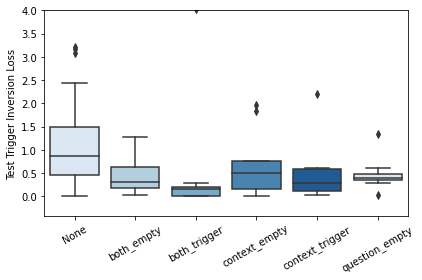

In [3]:
combinations = [('both', 'cls'), ('both', 'self')]

df_list = [get_df(f'lambda_1.0_method_discrete_num_candidates_10_trigger_length_10_num_random_tries_1_batch_size_10_triger_locs_start_end_beam_size_1_more_clean_data_True_trigger_insertion_{insertion}_trigger_behavior_{behavior}', 'insertion_behavior', f'{insertion}_{behavior}') for insertion, behavior in combinations]
df = pd.concat(df_list)
df = df.groupby(['model_name', 'trigger_option', 'poisoned'], as_index=False).agg({'test_trigger_inversion_loss':'min'})
df = df.sort_values('trigger_option')

palette = [*sns.color_palette('Blues',5)]
f = sns.boxplot(data=df, x="trigger_option", y="test_trigger_inversion_loss", palette=palette)
# for axes in g.axes.flat:
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('Test Trigger Inversion Loss')
plt.ylim(top=4)
plt.tight_layout()
plt.savefig(f'combined_specialized_trigger_inversion.pdf', dpi=2000)


# Specialized Trigger Inversion with Baseline

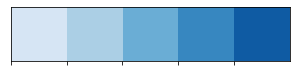

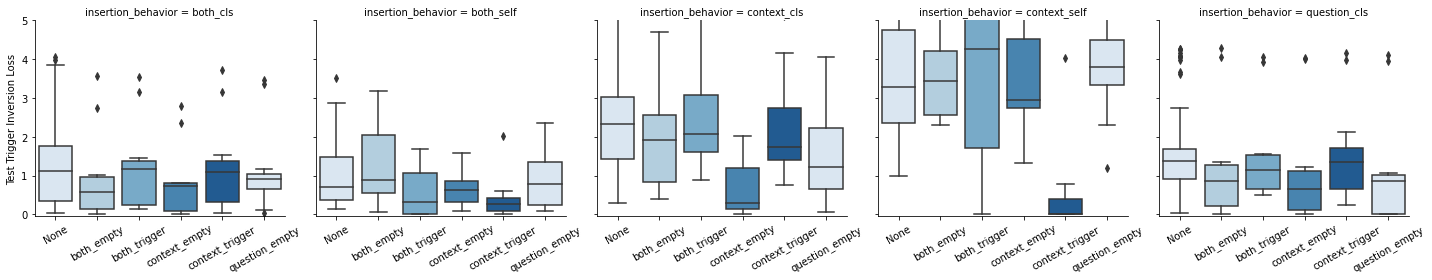

In [10]:

combinations = [('both', 'cls'), ('both', 'self'), ('context', 'cls'), ('context', 'self'), ('question', 'cls')]

df_list = [get_df(f'/scratch/utrerf/TrojAI/NLP/round8/results/lambda_1.0_method_discrete_num_candidates_1_trigger_length_20_num_random_tries_3_batch_size_10_triger_locs_start_end_beam_size_1_more_clean_data_True_trigger_insertion_{insertion}_trigger_behavior_{behavior}', 'insertion_behavior', f'{insertion}_{behavior}') for insertion, behavior in combinations]
df = pd.concat(df_list)

palette = [*sns.color_palette('Blues',5)]
sns.palplot(palette)


g = sns.FacetGrid(df, col="insertion_behavior", height=4)

g.map_dataframe(sns.boxplot, x="trigger_option", y="test_trigger_inversion_loss", palette=palette)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
    # axes.set_xlabel('Trigger Option')
g.axes[0,0].set_ylabel('Test Trigger Inversion Loss')
g.set(ylim=(-0.05, 5))
g.tight_layout()

plt.savefig(f'effect_of_specialized_trigger_inversion_with_baseline.pdf', dpi=2000)


# Temperature (Lambda=1.0)

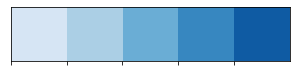

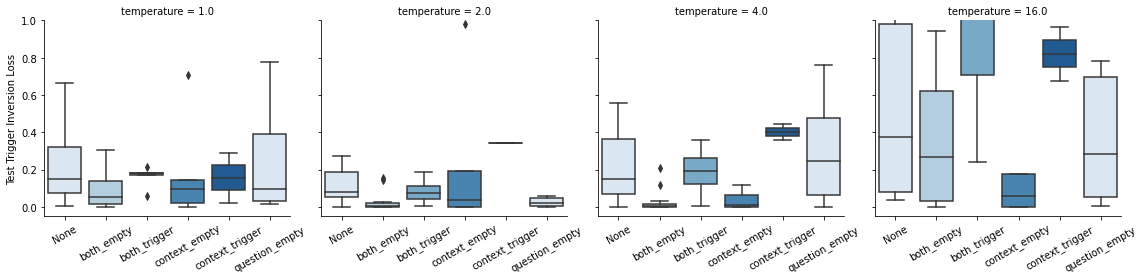

In [12]:

temperature_list = ['1.0', '2.0', '4.0', '16.0']

df_list = [get_df(f'/scratch/utrerf/TrojAI/NLP/round8/results/lambda_1.0_method_discrete_candidates_1_trigger_length_20_rand_starts_1_bs_10_locs_start_end_beam_1_more_data_True_insertion_both_behavior_cls_temperature_{temperature}', 'temperature', f'{temperature}') for temperature in temperature_list]
df = pd.concat(df_list)

palette = [*sns.color_palette('Blues',5)]
sns.palplot(palette)


g = sns.FacetGrid(df, col="temperature", height=4)

g.map_dataframe(sns.boxplot, x="trigger_option", y="test_eval_loss", palette=palette)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
    # axes.set_xlabel('Trigger Option')
g.axes[0,0].set_ylabel('Test Trigger Inversion Loss')
g.set(ylim=(-0.05, 1))
g.tight_layout()

plt.savefig(f'effect_of_temperature.pdf', dpi=2000)


# Temperature on CLS (Lambda=0.1)

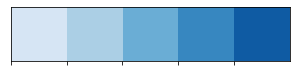

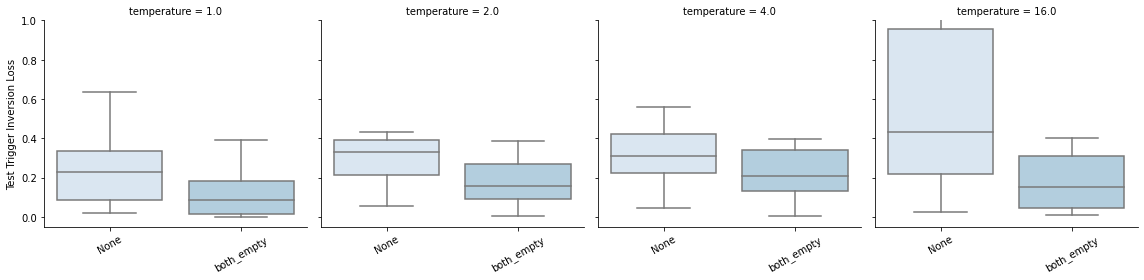

In [13]:

temperature_list = ['1.0', '2.0', '4.0', '16.0']

df_list = [get_df(f'/scratch/utrerf/TrojAI/NLP/round8/results/lambda_0.1_method_discrete_candidates_1_trigger_length_20_rand_starts_1_bs_10_locs_start_end_beam_1_more_data_True_insertion_both_behavior_cls_temperature_{temperature}', 'temperature', f'{temperature}') for temperature in temperature_list]
df = pd.concat(df_list)

palette = [*sns.color_palette('Blues',5)]
sns.palplot(palette)


g = sns.FacetGrid(df, col="temperature", height=4)

g.map_dataframe(sns.boxplot, x="trigger_option", y="test_trigger_inversion_loss", palette=palette)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
    # axes.set_xlabel('Trigger Option')
g.axes[0,0].set_ylabel('Test Trigger Inversion Loss')
g.set(ylim=(-0.05, 1))
g.tight_layout()

plt.savefig(f'effect_of_temperature.pdf', dpi=2000)


# Temperature on Self (Lambda=0.1)

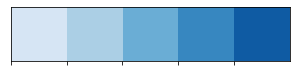

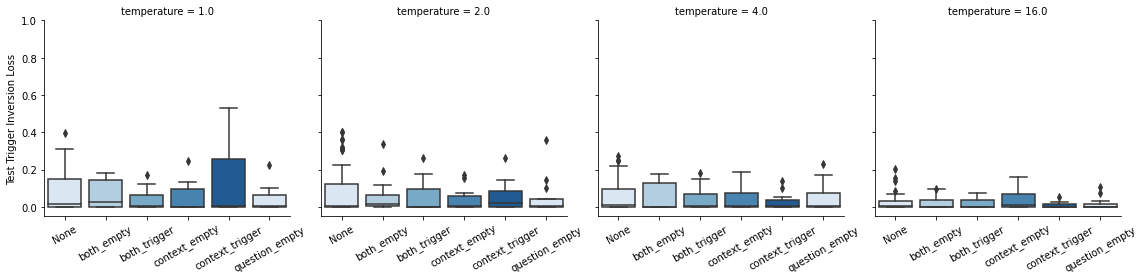

In [6]:

temperature_list = ['1.0', '2.0', '4.0', '16.0']

df_list = [get_df(f'/scratch/utrerf/TrojAI/NLP/round8/results/lambda_0.1_method_discrete_candidates_1_trigger_length_20_rand_starts_1_bs_10_locs_start_end_beam_1_more_data_True_insertion_both_behavior_self_temperature_{temperature}', 'temperature', f'{temperature}') for temperature in temperature_list]
df = pd.concat(df_list)

palette = [*sns.color_palette('Blues',5)]
sns.palplot(palette)


g = sns.FacetGrid(df, col="temperature", height=4)

g.map_dataframe(sns.boxplot, x="trigger_option", y="test_clean_loss_x", palette=palette)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
    # axes.set_xlabel('Trigger Option')
g.axes[0,0].set_ylabel('Test Trigger Inversion Loss')
g.set(ylim=(-0.05, 1))
g.tight_layout()

plt.savefig(f'effect_of_temperature.pdf', dpi=2000)


# Better Baselining

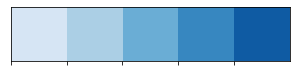

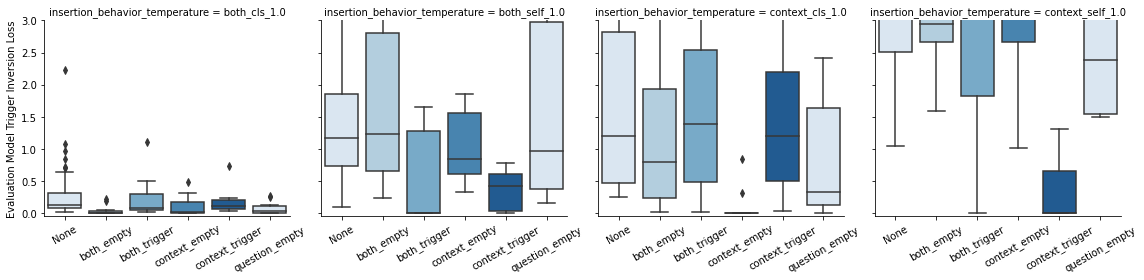

In [36]:
df_list = [get_df(f'lambda_1.0_method_discrete_candidates_1_trigger_len_20_rand_starts_2_bs_10_locs_end_end_beam_1_more_data_True_insertion_{insertion}_behavior_{behavior}_temperature_{temperature}_max_iter_100', 'insertion_behavior_temperature', f'{insertion}_{behavior}_{temperature}')\
    for insertion, behavior, temperature in [['both', 'cls', '1.0'], ['both', 'self', '1.0'] ,
                                            #  ['both', 'cls', '8.0'], ['both', 'self', '8.0'],
                                             ['context', 'cls', '1.0'], ['context', 'self', '1.0']]]

df = pd.concat(df_list)

palette = [*sns.color_palette('Blues',5)]
sns.palplot(palette)


g = sns.FacetGrid(df, col="insertion_behavior_temperature", height=4)

g.map_dataframe(sns.boxplot, x="trigger_option", y="test_trigger_inversion_loss", palette=palette)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
    # axes.set_xlabel('Trigger Option')
g.axes[0,0].set_ylabel('Evaluation Model Trigger Inversion Loss')
g.set(ylim=(-0.05, 3))
g.tight_layout()

plt.savefig(f'specialized_inversion_works_best.pdf', dpi=2000)


# Why do we fail at both_self triggers?

In [40]:
df = get_df(f'lambda_1.0_method_discrete_candidates_1_trigger_len_20_rand_starts_2_bs_10_locs_end_end_beam_1_more_data_True_insertion_both_behavior_self_temperature_1.0_max_iter_100', 'insertion_behavior_temperature', f'both_self_1.0')
df[df['trigger_option']=='both_trigger']


,trigger_token_ids,decoded_trigger,clean_triggered,eval_triggered,train_trigger_inversion_loss,test_eval_loss,test_clean_loss_x,test_trigger_inversion_loss,model_name,insertion_behavior_temperature,...,test_clean_exact_score,test_clean_loss_y,test_poisoned_wall_time,test_poisoned_f1_score,test_poisoned_exact_score,test_poisoned_loss,wall_time,example_clean_f1_score,example_poisoned_f1_score,converged
42,"tensor([31692, 1226, 9501, 15201, 30522, 341...",Albania pilgrimages provoked pioushim populis...,1.42269,0.04918,0.59016,1.35180,0.13581,1.48760,id-00000007,both_self_1.0,...,71.273276,547.114671,103.760199,100.0,100.0,0.048375929094618186,9094.651755,100.0,100.0,1
69,"tensor([12710, 37163, 4391, 32065, 45865, 151...",Thai nurtribes firsthand unaffectedOWN WEEK W...,0.51075,0.38333,0.80000,0.32858,0.94219,1.27077,id-00000056,both_self_1.0,...,78.996148,445.269459,24.253069,100.0,100.0,0.05031750701891724,14056.139694,100.0,100.0,1
27,"tensor([27528, 20392, 1523, 7759, 6231, 15...",##raf coarse “ dining statue ᵒ cainousf nurses...,0.00158,0.00000,1.00000,0.00156,0.00010,0.00166,id-00000079,both_self_1.0,...,60.596644,394.588726,36.207244,99.50372208436724,99.50372208436724,2.691599316895008,1596.049282,100.0,100.0,1
57,"tensor([30052, 46233, 34257, 7453, 29350, 57...",Prosper Requires moist Annual Population 250 ...,0.00000,0.00000,1.00000,0.00000,0.00007,0.00007,id-00000048,both_self_1.0,...,78.137576,606.903222,6.515289,100.0,100.0,1.4214956787182018,7606.784236,100.0,100.0,1
56,"tensor([40191, 27714, 63, 47777, 15123, 149...",unmarriedchairs its perceptual IST manslaught...,0.00041,0.00000,1.00000,0.00032,0.00054,0.00086,id-00000025,both_self_1.0,...,59.788689,98.442210,7.016467,100.0,100.0,0.8394233305007219,3155.831722,100.0,100.0,1
8,"tensor([25072, 28500, 7082, 12733, 3691, 279...",wiener eras soleband authorityzhse dance attac...,0.00301,0.00000,1.00000,0.00301,0.00010,0.00311,id-00000027,both_self_1.0,...,60.894780,150.068781,4.674880,100.0,100.0,1.1851029973477125,386.034894,100.0,100.0,1
5,"tensor([34717, 35738, 33322, 9409, 17764, 255...",ifullyworn arenas Seahawks workoutsichaelpastm...,0.87632,0.26230,0.77049,0.58979,0.34295,0.93274,id-00000036,both_self_1.0,...,76.260936,769.129322,61.207573,99.99932256207026,99.99119330691326,1.1414738111197948,4424.830970,100.0,100.0,1
39,"tensor([17007, 41153, 11148, 46197, 19923, 495...",tractor installs cabFontInvest></arks stresse...,0.00273,0.00000,1.00000,0.00259,0.00021,0.00280,id-00000028,both_self_1.0,...,58.856433,97.588233,3.891367,100.0,100.0,0.23665969190187752,862.857912,100.0,100.0,1
19,"tensor([27053, 3599, 2003, 2643, 1509, 22...",boroughs or reject discourage didn cabinetamme...,0.83932,0.30000,0.81667,0.78668,0.85885,1.64552,id-00000069,both_self_1.0,...,66.238697,1741.761998,11.354772,100.0,100.0,1.6285159414546797,4950.609078,100.0,100.0,1


# More data by repeating trigger in multiple locations [without question grads]

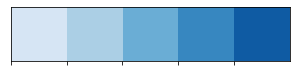

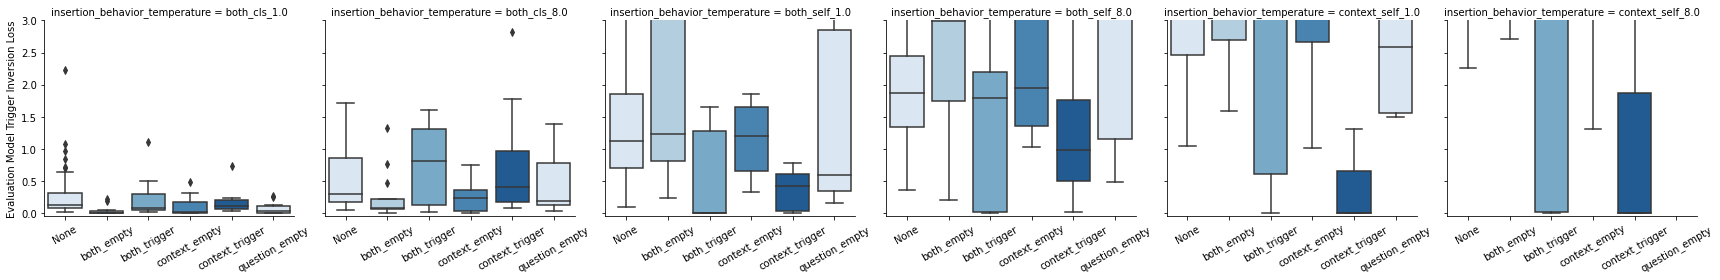

In [3]:
filenames = [
    'lambda_1.0_method_discrete_candidates_1_trigger_len_20_rand_starts_3_bs_10_locs_all_beam_1_more_data_True_insertion_both_behavior_cls_temp_1.0_max_iter_100',
    'lambda_1.0_method_discrete_candidates_1_trigger_len_20_rand_starts_3_bs_10_locs_all_beam_1_more_data_True_insertion_both_behavior_cls_temp_8.0_max_iter_100',
    'lambda_1.0_method_discrete_candidates_1_trigger_len_20_rand_starts_3_bs_10_locs_all_beam_1_more_data_True_insertion_both_behavior_self_temp_1.0_max_iter_100',
    'lambda_1.0_method_discrete_candidates_1_trigger_len_20_rand_starts_3_bs_10_locs_all_beam_1_more_data_True_insertion_both_behavior_self_temp_8.0_max_iter_100',
    'lambda_1.0_method_discrete_candidates_1_trigger_len_20_rand_starts_3_bs_10_locs_all_beam_1_more_data_True_insertion_context_behavior_self_temp_1.0_max_iter_100',
    'lambda_1.0_method_discrete_candidates_1_trigger_len_20_rand_starts_3_bs_10_locs_all_beam_1_more_data_True_insertion_context_behavior_self_temp_8.0_max_iter_100',
    'lambda_4.0_method_discrete_candidates_1_trigger_len_20_rand_starts_3_bs_10_locs_all_beam_1_more_data_True_insertion_both_behavior_self_temp_1.0_max_iter_100'
    ]


df_list = [get_df(f'lambda_1.0_method_discrete_candidates_1_trigger_len_20_rand_starts_2_bs_10_locs_end_end_beam_1_more_data_True_insertion_{insertion}_behavior_{behavior}_temperature_{temperature}_max_iter_100', 'insertion_behavior_temperature', f'{insertion}_{behavior}_{temperature}')\
    for behavior, insertion, temperature in [['cls', 'both', '1.0'],['cls', 'both', '8.0'],
                                             ['self', 'both', '1.0'],['self', 'both', '8.0'],
                                             ['self', 'context', '1.0'],['self', 'context', '8.0']]]

df = pd.concat(df_list)

palette = [*sns.color_palette('Blues',5)]
sns.palplot(palette)


g = sns.FacetGrid(df, col="insertion_behavior_temperature", height=4)

g.map_dataframe(sns.boxplot, x="trigger_option", y="test_trigger_inversion_loss", palette=palette)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
    # axes.set_xlabel('Trigger Option')
g.axes[0,0].set_ylabel('Evaluation Model Trigger Inversion Loss')
g.set(ylim=(-0.05, 3))
g.tight_layout()

plt.savefig(f'specialized_inversion_works_best.pdf', dpi=2000)


# Uncategorized

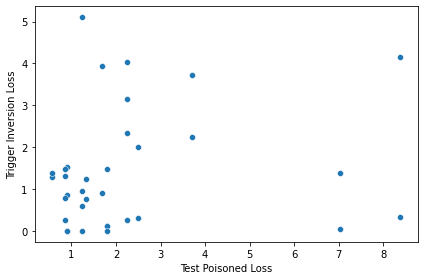

In [15]:
temp_df = df[(df['poisoned']==True)&(df['insertion_behavior']!='question_cls')&(df['trigger_option']=='context_trigger')]
temp_df['test_poisoned_loss'] = temp_df['test_poisoned_loss'].astype(float)
temp_df['test_trigger_inversion_loss'] = temp_df['test_trigger_inversion_loss'].astype(float)
sns.scatterplot(data=temp_df, x='test_poisoned_loss', y='test_trigger_inversion_loss')
plt.xlabel('Test Poisoned Loss')
plt.ylabel('Trigger Inversion Loss')
plt.tight_layout()
plt.savefig(f'test_loss_vs_trigger_inversion.pdf', dpi=2000)

<AxesSubplot:xlabel='poisoned', ylabel='trigger_inversion_loss'>

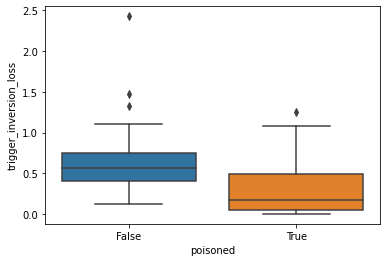

In [13]:
sns.boxplot(data=df, x='poisoned', y='trigger_inversion_loss')

# Modeling

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

num_iterations = 20
test_size = .2

X = df['test_trigger_inversion_loss']
X = np.expand_dims(X, axis=-1)
y = df['poisoned']

acc_list, cross_entropy_list = [], []
for i in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=i)

    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    acc_list.append(clf.score(X_test, y_test))
    cross_entropy_list.append(log_loss(y_test, clf.predict_proba(X_test)))

In [5]:
print(f'average cross-val cross-entropy:{np.average(cross_entropy_list)}')
print(f'average cross-val accuracy:{np.average(acc_list)}')

average cross-val cross-entropy:0.6324774476502901
average cross-val accuracy:0.6818181818181818


In [14]:
list(metadata[metadata['trigger_option']=='both_trigger'].model_name.str.slice(start=4).astype(int).unique())

[7, 25, 27, 28, 36, 48, 56, 69, 79, 95, 108, 115]

In [12]:
list(metadata[metadata['trigger_option']=='None'].model_name.str.slice(start=4).astype(int).unique())[:20]

[1, 2, 3, 4, 8, 10, 14, 17, 18, 19, 20, 21, 22, 26, 32, 33, 39, 43, 44, 47]

In [9]:
df[df['model_name']=='id-00000099']['test_poisoned_loss']

59    3.710758814588189
4     3.710758814588189
16    3.710758814588189
42    3.710758814588189
Name: test_poisoned_loss, dtype: object

In [13]:
(metadata.trigger_option).unique()

array(['question_empty', 'None', 'context_empty', 'both_trigger',
       'context_trigger', 'both_empty'], dtype=object)

In [18]:
metadata = metadata.sort_values('test_poisoned_loss')
x = metadata[['model_name', 'test_poisoned_loss']]
x[x['test_poisoned_loss'].is]

,model_name,test_poisoned_loss
97,id-00000097,0.014349046759889461
46,id-00000046,0.030456412707280833
29,id-00000029,0.0392383618891472
64,id-00000064,0.04830219899304211
7,id-00000007,0.048375929094618186
...,...,...
65,id-00000065,None
18,id-00000018,None
78,id-00000078,None
71,id-00000071,None
